## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [105]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [106]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [107]:
## to find just row we will use shape[0]
df.shape[0]

294478

c. The number of unique users in the dataset.

In [108]:
## we use nuniqu() function to find the number of unique
df.user_id.nunique()
    

290584

d. The proportion of users converted.

In [109]:
## To find the proprtion for sample we use the mean function
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [110]:
df.groupby(['landing_page'])['group'].value_counts()

landing_page  group    
new_page      treatment    145311
              control        1928
old_page      control      145274
              treatment      1965
Name: group, dtype: int64

In [111]:
##To find the numbers of new page and treatment that do not match so we use the groupby fuction after that we sum 
##the control in new page and the treatment in old page and the result is 3893
numcontrol = 1928
numtreatment = 1965
total = numcontrol + numtreatment
print (total)

3893


f. Do any of the rows have missing values?

In [112]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [113]:
df2=df

In [114]:
# Double Check all of the correct rows were removed - this should be 0
newpage_treatment=df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False]
newpage_treatment.shape[0]

3893

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [115]:
## we use the numique function to find the unique number
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [116]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
11215,839784,2017-01-08 20:21:17.123650,treatment,old_page,0
11428,926754,2017-01-18 01:13:55.001878,treatment,new_page,0
12858,793494,2017-01-20 08:48:41.498741,control,old_page,0
13262,892450,2017-01-10 20:17:27.416653,treatment,old_page,0
14487,883654,2017-01-20 04:56:00.925154,control,old_page,0


c. What is the row information for the repeat **user_id**? 

In [117]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [118]:
## we use drop function to remove the duplicates value
df2=df2.drop_duplicates(['user_id'])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [119]:
## we use the mean to find the probability
df2.converted.mean()*100

11.956955647936569

b. Given that an individual was in the `control` group, what is the probability they converted?

In [120]:
## First we select the control from group column anfter that we find the probability of converted using mean function
df2[((df2['group'] == 'control'))].converted.mean()*100

12.029717968491791

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [121]:
## First we select the treatment from group column anfter that we find the probability of converted using mean function
df2[((df2['group'] == 'treatment'))].converted.mean()

0.11884253398646046

d. What is the probability that an individual received the new page?

In [122]:
## First we select the new_page from landing_page column anfter that we find the probability of converted using mean function
(df2['landing_page'] == 'new_page' ).mean()

0.50009635767970706

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

## Based on the processes we calculated above, I think there is not much difference between the new and the old pages, so the new page will not make a big change.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## we assume the null hypothesis is the  old and new pages it is the same and the alternative hypotheses is the new page is greater than old page 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [123]:
p_new = df2[((df2['landing_page'] == 'new_page'))].converted.mean()
p_new

0.11874483897605285

In [124]:
#p_new=df2.query('landing_page=="new_page"')
#page_new=p_new['converted'].mean()
#p_new
#print(page_new)

In [125]:
p_new = df2.converted.mean()
p_new

0.11956955647936569

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [126]:
p_old = df2[((df2['landing_page'] == 'old_page'))].converted.mean()
p_old



0.12039459191540919

In [127]:
p_old = df2.converted.mean()
p_old

0.11956955647936569

c. What is $n_{new}$, the number of individuals in the treatment group?

In [128]:
n_new =  df2.query('landing_page == "new_page"').count()[0]
n_new

145320

d. What is $n_{old}$, the number of individuals in the control group?

In [129]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145264

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [130]:
new_page_converted = (np.random.binomial(1, p_new, n_new)).mean()
print(new_page_converted)

0.120100467933


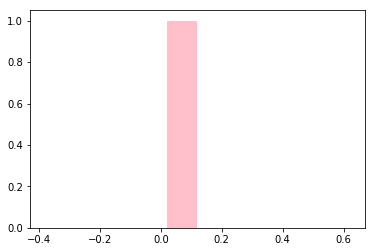

In [131]:
plt.hist(new_page_converted ,color='pink');

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [132]:
old_page_converted = np.random.binomial(1, p_old , n_old).mean()
old_page_converted

0.1201467672651173

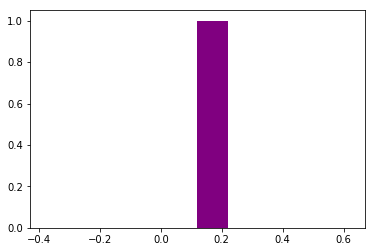

In [133]:
plt.hist(old_page_converted,color='Purple');

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [134]:
page_diff= (new_page_converted - old_page_converted)
page_diff

-4.6299332279425842e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [135]:
p_diffs = []
for _ in range(10000):
 new_page_converted = (np.random.binomial(1, p_new, n_new)).mean()
 old_page_converted = (np.random.binomial(1, p_old, n_old)).mean()
 p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

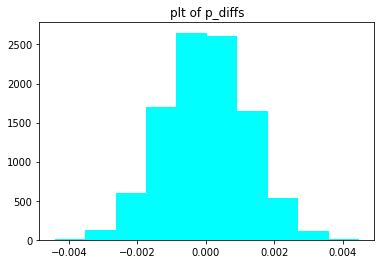

In [136]:
plt.hist(p_diffs , color = 'cyan')
plt.title('plt of p_diffs')
plt.show()

In [137]:
actual_diff = df2.query('landing_page == "new_page"').converted.mean() - \
                       df2.query('landing_page == "old_page"').converted.mean()
(p_diffs > actual_diff).mean()

0.91349999999999998

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## The p value is 0.917 so it's not less then 0.05 and not greater than 0.095 so the p value will not make a good change because we learned in course if p value less than 0.05 or greater than 0.95 that means it is good value

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [138]:
import statsmodels.api as sm
convert_old = df2.query("((group == 'control'))")
convert_old = df2.query("((converted == 1))").shape[0]
convert_new = df2.query("((group == 'treatment'))")
convert_new = df2.query("((converted == 1))").shape[0]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [139]:
## we use the formula to to calculation z_score
z_score = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='two-sided')[0]
z_score    


0.12480101331553892

In [140]:
## we use the smae formula of z value to to calculation the p_value
p_value= sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='two-sided')[1]
p_value   

0.9006810851557544

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## The z_score is it 0.12 and p_value it Almost one suggests that we should not  to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

## The type of regression is Logistic Regression becouse it is either conversion or no conversion

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [141]:
import statsmodels.api as sm

## here we add intercept and we add a dummies value
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [142]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366064
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [143]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-26 13:14 AIC:              212748.6664
No. Observations:   290584           BIC:              212769.8257
Df Model:           1                Log-Likelihood:   -1.0637e+05
Df Residuals:       290582           LL-Null:          -1.0637e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9896    0.0081  -246.6589  0.0000  -2.0054  -1.9738
ab_page      -0.0138    0.0114    -1.2084  0.2269  -0.0362   0.0086
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

## The p-value of ab_page in Logistic Regression is 0.22, the p_value in part ll is 0.9 it,s so diffrent becouse the null and alternative hypotheses are vice versa

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

## I think when we add more factors will get us good predictive to our data, and the disadvantages maybe when we add more we can not focus on important factors

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [144]:
countries=pd.read_csv("countries.csv")
countries.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [145]:
df2= df2.set_index('user_id').join(countries.set_index('user_id'))

In [147]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366059
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-26 13:15 AIC:              212749.9927
No. Observations:   290584           BIC:              212792.3113
Df Model:           3                Log-Likelihood:   -1.0637e+05
Df Residuals:       290580           LL-Null:          -1.0637e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9903    0.0089  -223.7821  0.0000  -2.0077  -1.9728
ab_page      -0.0138    0.0114    -1.2043  0.2285  -0.0362   0.0086
CA           -0.0363    0.0268    -1.3516  0.1765  -0.0889   0.0163
UK            0.0097    0.0133     0.7260  0.4678  -0.0164   0.0357
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [148]:
df2['CA_page'] = df2['CA']*df2['ab_page']
df2['UK_page'] = df2['UK']*df2['ab_page']
df2['US_page'] = df2['US']*df2['ab_page']
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366059
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-26 13:15 AIC:              212748.0289
No. Observations:   290584           BIC:              212779.7679
Df Model:           2                Log-Likelihood:   -1.0637e+05
Df Residuals:       290581           LL-Null:          -1.0637e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9965    0.0062  -322.0450  0.0000  -2.0086  -1.9843
CA_page      -0.0681    0.0375    -1.8160  0.0694  -0.1417   0.0054
UK_page       0.0130    0.0173     0.7523  0.4519  -0.0209   0.0469
==================================================================

"""

## conclusion

At the end we discussed three parts the first part is Probability we find the proportion and clean the data like drop and check the duplication the second part is A/B test we find the z_score and p_value, the thired part is regression we learn the type of regression and how to deal with it. finaly Based on my observations, we cannot say the new page work better than the old one.so we will reject the null hypothesis and we can say the old page is better than new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])